<a href="https://colab.research.google.com/github/ole-ksandra/IAD/blob/main/%D0%9F%D1%801_%D0%A4%D0%91_%D0%B751%D0%BC%D0%BF_Oleksandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pr 1. SALARY dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Завантажити дані, вивести на екран назви колонок і розмір датасета

In [2]:
#https://www.kaggle.com/datasets/whenamancodes/infoseccyber-security-salaries?utm_source=chatgpt.com

url='https://drive.google.com/file/d/1WpOKlJ4Oa54EzWEzPxMKtpqsUG9GfgBf/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_train = pd.read_csv(url_)

In [3]:
df_train.shape

(1349, 11)

In [4]:
print("Назви колонок:")
print(df_train.columns.tolist())

Назви колонок:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


Поглянемо на перші **рядки**

In [5]:
df_train.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M
2,2022,SE,FT,Security Officer,88100,USD,88100,US,0,US,M
3,2022,SE,FT,Security Engineer,163575,USD,163575,US,100,US,M
4,2022,SE,FT,Security Engineer,115800,USD,115800,US,100,US,M
5,2022,MI,FT,Penetration Testing Engineer,40000,EUR,42801,CY,100,CY,L
6,2022,SE,FT,Security Analyst,136600,USD,136600,US,100,US,M
7,2022,SE,FT,Security Analyst,109280,USD,109280,US,100,US,M
8,2022,SE,FT,Security Engineer,211600,USD,211600,US,100,US,M
9,2022,SE,FT,Security Engineer,182160,USD,182160,US,100,US,M


# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

## Data Visualization with seaborn

 Missing Data

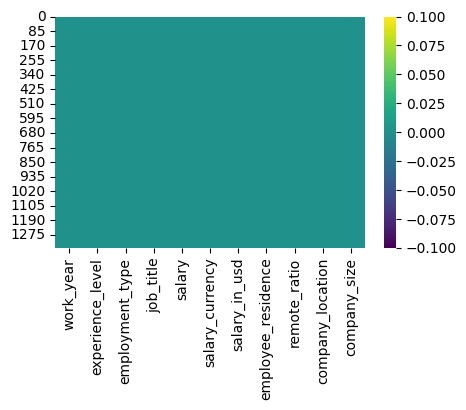

In [6]:
plt.figure(figsize=(5,3))
sns.heatmap(df_train.isnull(), cmap='viridis')
plt.show()

In [7]:
print("Кількість пропусків у кожній колонці:")
print(df_train.isnull().sum())

Кількість пропусків у кожній колонці:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


За результатами аналізу пропусків (heatmap та підрахунок) пропусків у датасеті не виявлено, тому додаткове заповнення або видалення рядків/стовпців не виконувалось.

# 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома).


countplot по work_year, experience_level, employment_type, salary

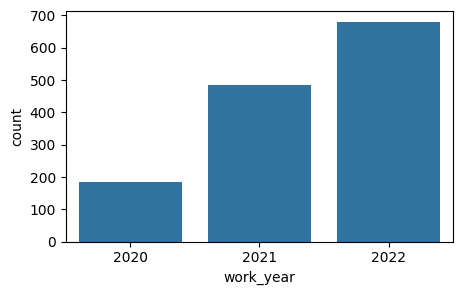

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(x='work_year',data=df_train)
plt.show()

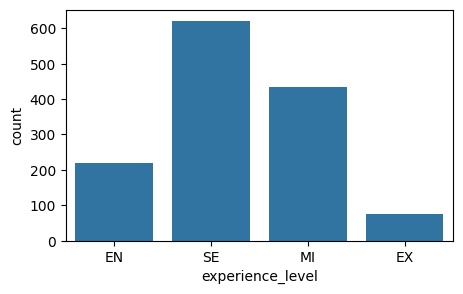

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(x='experience_level',data=df_train)
plt.show()

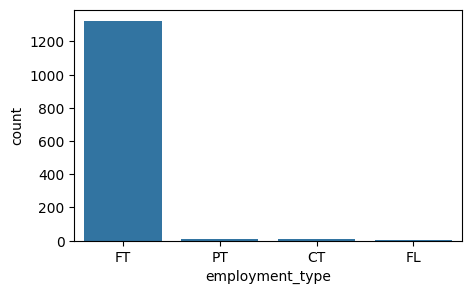

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x='employment_type',data=df_train) # робоча зайнятість, повний день, частково ...
plt.show()

Кількість спеціалістів за рівнем досвіду

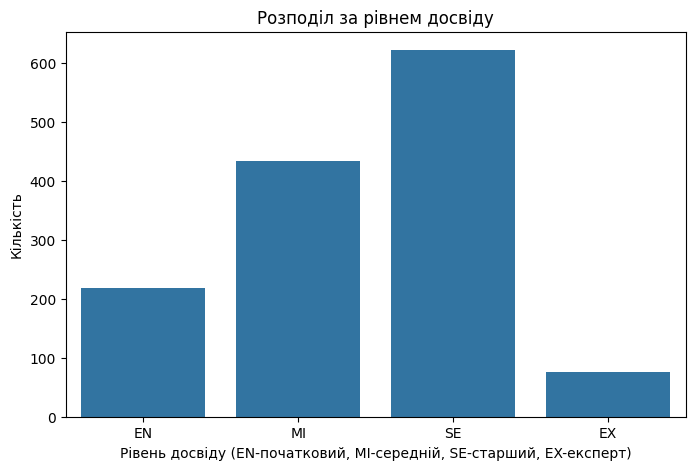

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='experience_level', data=df_train, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Розподіл за рівнем досвіду')
plt.xlabel('Рівень досвіду (EN-початковий, MI-середній, SE-старший, EX-експерт)')
plt.ylabel('Кількість')
plt.show()

#### 3. Рівень досвіду відносно розміру компанії
Тепер подивимося, як рівень досвіду розподіляється залежно від розміру компанії (company_size). Це аналогічно до того, як у прикладі аналізували виживання за статтю (Sex).

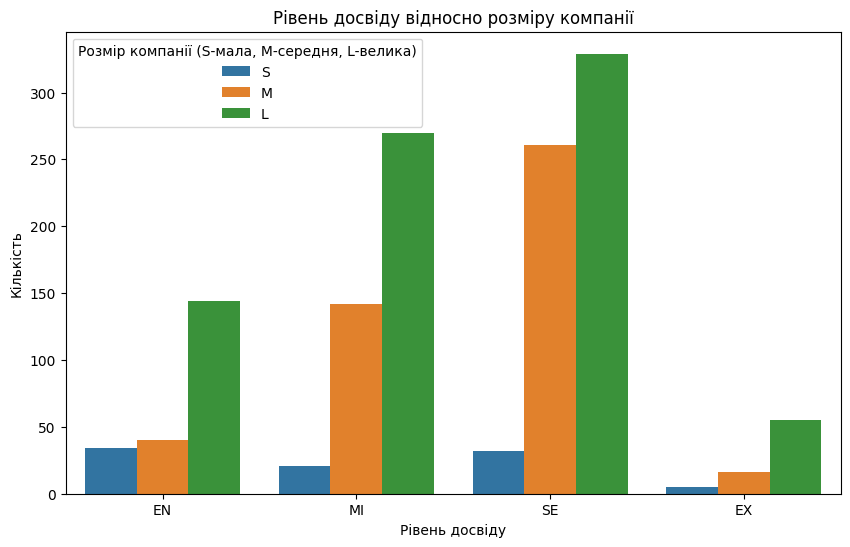

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', hue='company_size', data=df_train, order=['EN', 'MI', 'SE', 'EX'], hue_order=['S', 'M', 'L'])
plt.title('Рівень досвіду відносно розміру компанії')
plt.xlabel('Рівень досвіду')
plt.ylabel('Кількість')
plt.legend(title='Розмір компанії (S-мала, M-середня, L-велика)')
plt.show()


#### 4. Розподіл зарплат. histplot для salary_in_usd
Побудуємо гістограму для аналізу розподілу зарплат (salary_in_usd). Це схоже на аналіз віку (Age) пасажирів "Титаніка".

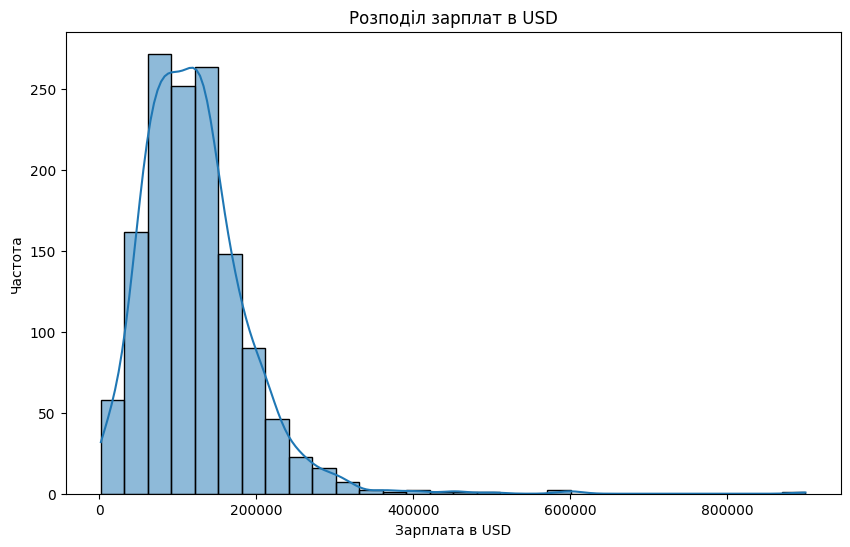

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['salary_in_usd'], bins=30, kde=True)
plt.title('Розподіл зарплат в USD')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()

гістограми розподілу ознак (кількох)

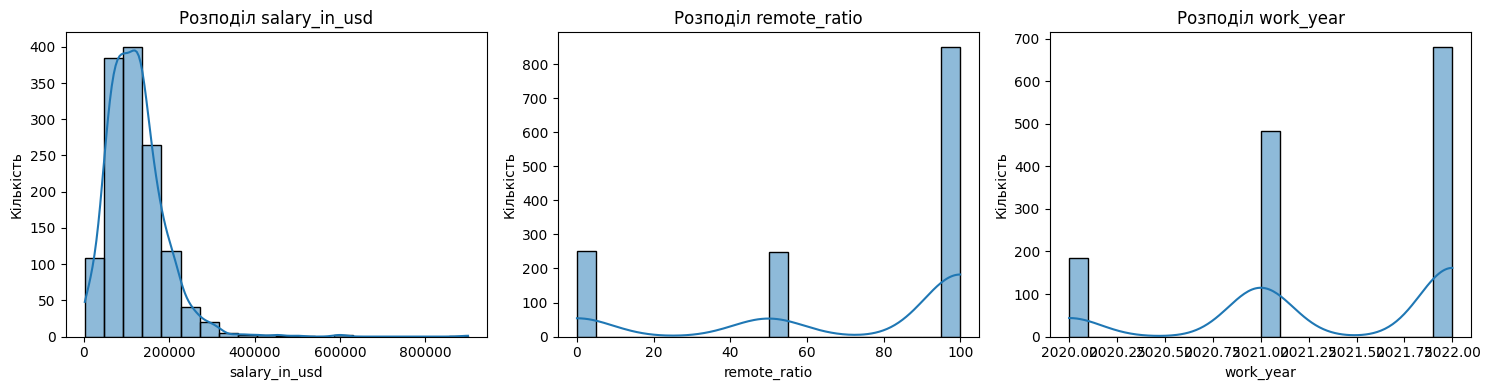

In [14]:
features_for_hist = ['salary_in_usd', 'remote_ratio', 'work_year']

plt.figure(figsize=(15, 4))

for i, col in enumerate(features_for_hist, 1):
    plt.subplot(1, len(features_for_hist), i)
    sns.histplot(df_train[col], bins=20, kde=True)
    plt.title(f'Розподіл {col}')
    plt.xlabel(col)
    plt.ylabel('Кількість')

plt.tight_layout()
plt.show()


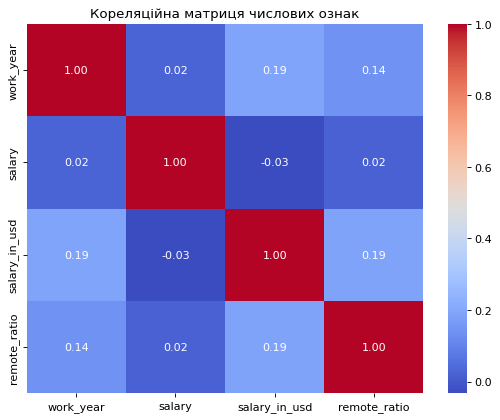

In [15]:
# Вибираємо тільки числові стовпці для кореляційної матриці
numeric_cols = df_train.select_dtypes(include=np.number)
corr = numeric_cols.corr()

# Будуємо теплову карту
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Кореляційна матриця числових ознак')
plt.show()

**heatmap не включає experience_level, бо це рядковий стовпець.**

кореляції ознак між собою і з цільовою змінною (розміткою). Тож робимо ще одну комірку, де кодуємо experience_level в числа й рахуємо кореляцію вже з нею.

- не чіпаємо основний df_train['experience_level'] (він залишається строковим для графіків);

- додаємо окрему колонку experience_level_num тільки для аналізу/моделей;

зарплата суттєво корелює з рівнем досвіду;

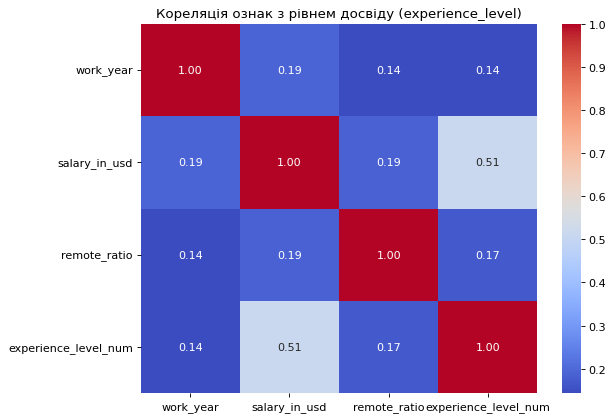

In [16]:
# Додаємо числове представлення цільової змінної
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df_train['experience_level_num'] = df_train['experience_level'].map(exp_map)

# Обираємо кілька важливих ознак + ціль
corr_features = ['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_num']
corr_target = df_train[corr_features].corr()

plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(corr_target, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Кореляція ознак з рівнем досвіду (experience_level)')
plt.show()


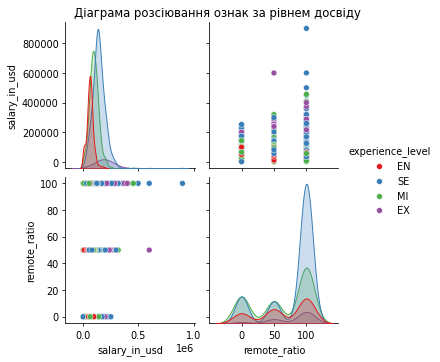

In [17]:
# Створюємо pairplot для обраних стовпців
# Ми використовуємо hue='experience_level', щоб розрізняти точки за рівнем досвіду
plt.rcParams['figure.dpi'] = 70 # Зменшуємо розмір для кращої читабельності
sns.pairplot(df_train[['salary_in_usd', 'remote_ratio', 'experience_level', 'company_size']],
             hue="experience_level",
             palette='Set1',
             height=2.5)
plt.suptitle('Діаграма розсіювання ознак за рівнем досвіду', y=1.02) # Додаємо загальний заголовок
plt.show()

#### Для зарплат за рівнем досвіду. boxplot salary_in_usd vs experience_level;

Цей графік (boxplot) чудово показує, як розподіляються зарплати для кожного рівня досвіду. Він є аналогом графіка, що порівнював вік пасажирів у різних класах (Pclass).

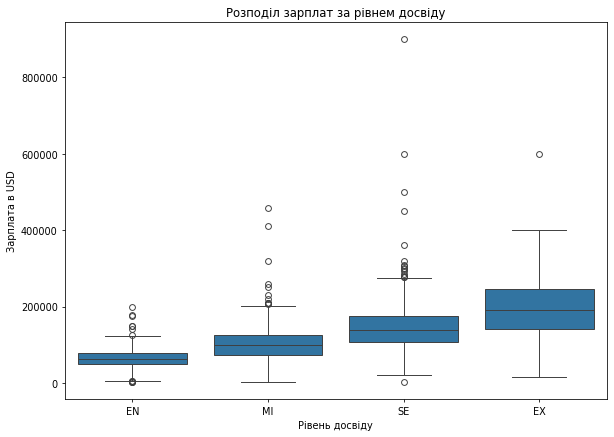

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_train, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Розподіл зарплат за рівнем досвіду')
plt.xlabel('Рівень досвіду')
plt.ylabel('Зарплата в USD')
plt.show()

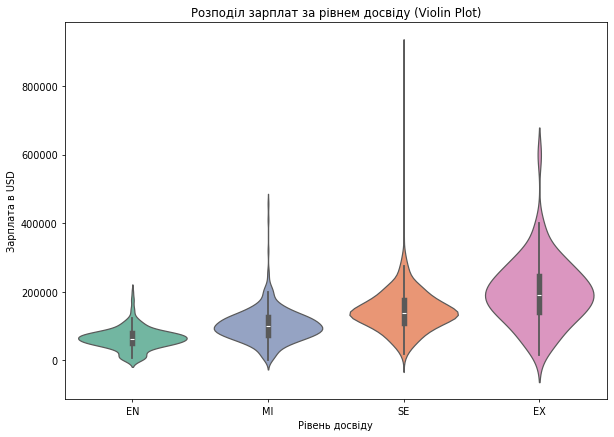

In [19]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="experience_level", y="salary_in_usd", hue="experience_level",
               data=df_train, palette="Set2", order=['EN', 'MI', 'SE', 'EX'])
plt.title('Розподіл зарплат за рівнем досвіду (Violin Plot)')
plt.xlabel('Рівень досвіду')
plt.ylabel('Зарплата в USD')
plt.show()

### Обробка змісту таблиці

Видалення зайвих стовпців
Залишимо тільки salary_in_usd як основний показник зарплати.
salary + salary_currency дублюють цю інформацію й тільки ускладнюють модель.

In [20]:
# Видаляємо стовпці 'salary' та 'salary_currency'
df_train = df_train.drop(['salary', 'salary_currency'], axis=1)

# Перевіримо результат
print("Стовпці після видалення:")
print(df_train.columns)

Стовпці після видалення:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'experience_level_num'],
      dtype='object')


# **Decision Tree**
Основна ідея: Ми спробуємо навчити модель передбачати рівень досвіду спеціаліста (experience_level) на основі інших даних, таких як зарплата, розмір компанії та тип зайнятості.

Спочатку нам потрібно розділити дані на ознаки (X) — те, на основі чого модель буде робити прогноз, і цільову змінну (y) — те, що ми хочемо спрогнозувати.
y = experience_level (наш цільовий показник).
X = всі інші корисні стовпці.

In [21]:
# Визначаємо цільову змінну (y) та ознаки (X)
X = df_train.drop('experience_level', axis=1)
y = df_train['experience_level']

In [22]:
# Визначаємо цільову змінну (y) та ознаки (X)
# ВИДАЛЯЄМО: 'job_title', 'employee_residence', 'company_location'
X = df_train.drop(['experience_level', 'job_title', 'experience_level_num', 'employee_residence', 'company_location'], axis=1)
y = df_train['experience_level']

перетворити всі наші текстові стовпці (employment_type, job_title і т.д.) у числовий формат.



In [23]:
# Перетворюємо категоріальні змінні в числові
X_encoded = pd.get_dummies(X, drop_first=True)

# Виведемо результат, щоб переконатися, що все гаразд
print("Кількість стовпців після коректного кодування:", X_encoded.shape[1])
print("\nНазви стовпців:")
print(X_encoded.columns)
print("\nПерші 5 рядків закодованих даних:")
print(X_encoded.head())

Кількість стовпців після коректного кодування: 8

Назви стовпців:
Index(['work_year', 'salary_in_usd', 'remote_ratio', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_M',
       'company_size_S'],
      dtype='object')

Перші 5 рядків закодованих даних:
   work_year  salary_in_usd  remote_ratio  employment_type_FL  \
0       2022          72762           100               False   
1       2022         123400             0               False   
2       2022          88100             0               False   
3       2022         163575           100               False   
4       2022         115800           100               False   

   employment_type_FT  employment_type_PT  company_size_M  company_size_S  
0                True               False           False            True  
1                True               False            True           False  
2                True               False            True           False  
3           

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split

Навчальна вибірка (X_train, y_train) — для тренування моделі.
Тестова вибірка (X_test, y_test) — для перевірки її точності на даних, яких вона ще не бачила.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42, stratify=y)

print("Розмір навчальної вибірки (X_train):", X_train.shape)
print("Розмір тестової вибірки (X_test):", X_test.shape)

Розмір навчальної вибірки (X_train): (944, 8)
Розмір тестової вибірки (X_test): (405, 8)


In [26]:
### 4. Навчання моделі Дерева Рішень


# Ініціалізація та навчання моделі
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Робимо передбачення на тестовій вибірці
y_pred = model.predict(X_test)

# Виводимо звіт про класифікацію
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred))

# Виводимо матрицю помилок
print("\nМатриця помилок:")
print(confusion_matrix(y_test, y_pred))

Звіт про класифікацію:
              precision    recall  f1-score   support

          EN       0.45      0.66      0.53        65
          EX       0.11      0.04      0.06        23
          MI       0.45      0.46      0.46       130
          SE       0.72      0.65      0.68       187

    accuracy                           0.56       405
   macro avg       0.43      0.45      0.43       405
weighted avg       0.56      0.56      0.55       405


Матриця помилок:
[[ 43   0  21   1]
 [  1   1   6  15]
 [ 37   2  60  31]
 [ 15   6  45 121]]


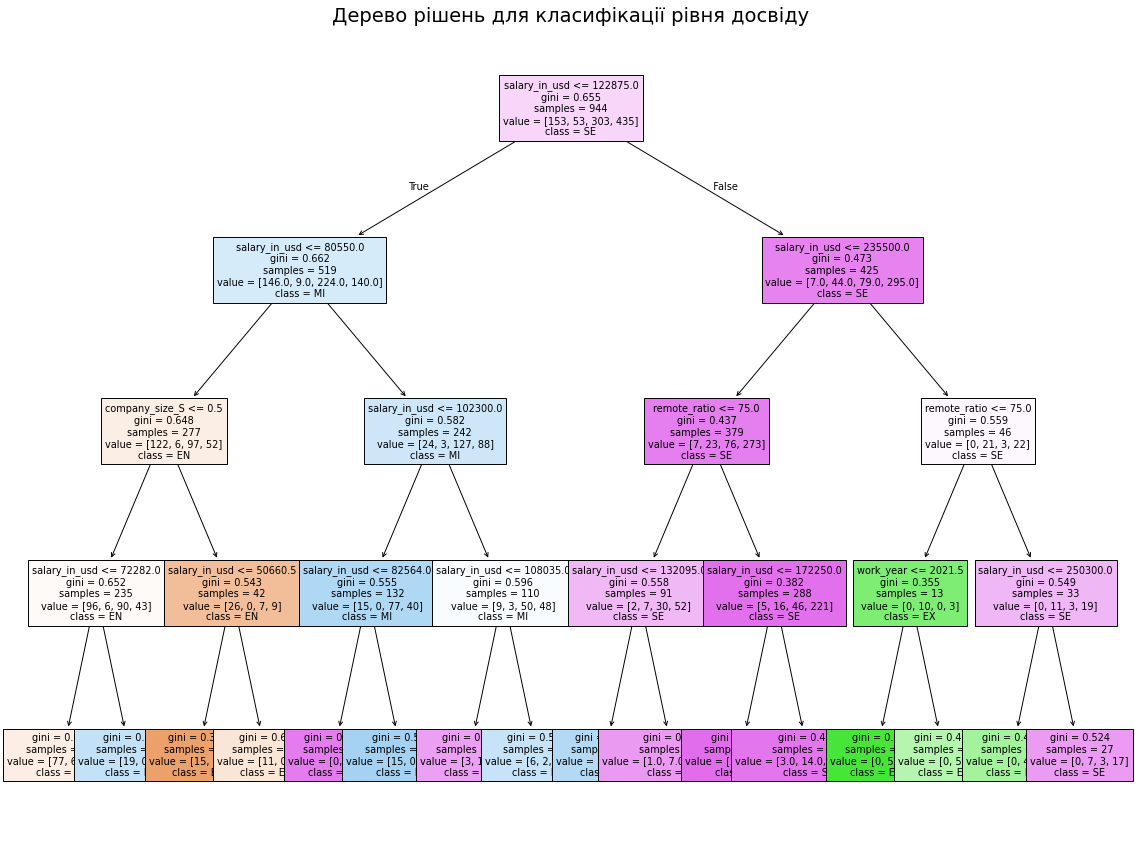

In [29]:
# Візуалізація дерева
plt.figure(figsize=(20, 15))
plot_tree(
    model,
    feature_names=X_encoded.columns,
    class_names=model.classes_,
    filled=True,
    fontsize=10
)
plt.title("Дерево рішень для класифікації рівня досвіду", fontsize=20)
plt.show()

#**K Nearest Neighbors** (kNN)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
# X_train, X_test, y_train, y_test вже існують з попереднього кроку

Для алгоритму kNN було виконане стандартизування ознак за допомогою StandardScaler: кожен числовий стовпець перетворено до нульового середнього та одиничного стандартного відхилення на тренувальній вибірці. Масштабування виконувалось лише на X_train, після чого ті самі параметри застосовано до X_test.

In [31]:
# Ініціалізація StandardScaler
scaler = StandardScaler()

# Навчаємо scaler тільки на тренувальних даних
scaler.fit(X_train)

# Трансформуємо і тренувальні, і тестові дані
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
print("Середнє значення по ознаках (після масштабування):")
print(np.mean(scaled_X_train, axis=0)[:5])  # перші 5

print("\nСтандартне відхилення по ознаках (після масштабування):")
print(np.std(scaled_X_train, axis=0)[:5])


Середнє значення по ознаках (після масштабування):
[-1.13730118e-13 -6.77424218e-17  1.35484844e-16  7.52693576e-18
 -3.91400660e-16]

Стандартне відхилення по ознаках (після масштабування):
[1. 1. 1. 1. 1.]


In [33]:
 # Ініціалізуємо KNN з k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Навчаємо модель на масштабованих даних
knn.fit(scaled_X_train, y_train)

# Робимо передбачення
pred = knn.predict(scaled_X_test)

# Оцінюємо результат
print("Результати для k=1:")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

Результати для k=1:
[[ 32   1  22  10]
 [  2   3   8  10]
 [ 22   6  53  49]
 [ 16   6  53 112]]


              precision    recall  f1-score   support

          EN       0.44      0.49      0.47        65
          EX       0.19      0.13      0.15        23
          MI       0.39      0.41      0.40       130
          SE       0.62      0.60      0.61       187

    accuracy                           0.49       405
   macro avg       0.41      0.41      0.41       405
weighted avg       0.49      0.49      0.49       405



Пошук оптимального k (цикл + графік error_rate)

In [34]:
error_rate = []

# Перебираємо значення k від 1 до 30
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    # Рахуємо середню помилку (де передбачення не дорівнює істинному значенню)
    error_rate.append(np.mean(pred_i != y_test))

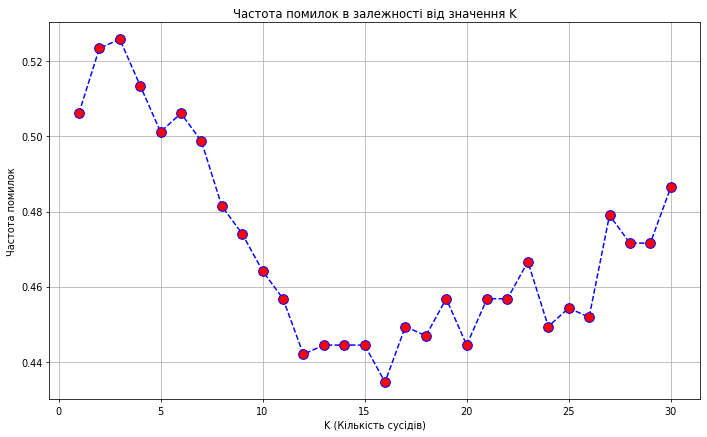

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Частота помилок в залежності від значення K')
plt.xlabel('K (Кількість сусідів)')
plt.ylabel('Частота помилок')
plt.grid()
plt.show()

In [36]:
# Обираємо k, де помилка мінімальна
optimal_k = 1 + np.argmin(error_rate)
print("Оптимальне k:", optimal_k)

# Навчання фінальної моделі
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(scaled_X_train, y_train)

pred_opt = knn_opt.predict(scaled_X_test)

print(f"\nРезультати для k={optimal_k}:")
print(confusion_matrix(y_test, pred_opt))
print("\n")
print(classification_report(y_test, pred_opt))


Оптимальне k: 16

Результати для k=16:
[[ 29   0  32   4]
 [  1   1   4  17]
 [ 26   1  68  35]
 [ 15   0  41 131]]


              precision    recall  f1-score   support

          EN       0.41      0.45      0.43        65
          EX       0.50      0.04      0.08        23
          MI       0.47      0.52      0.49       130
          SE       0.70      0.70      0.70       187

    accuracy                           0.57       405
   macro avg       0.52      0.43      0.43       405
weighted avg       0.57      0.57      0.56       405



За результатами експерименту залежності частоти помилок від параметра k було обрано оптимальне значення k = 16 . Для цього значення вдалося досягти точності (precision/recall/F1) на тестовій вибірці.

# Методу Опорних Векторів (SVM)

повертаємося до нашого початкового набору даних з усіма чотирма класами досвіду ('EN', 'MI', 'SE', 'EX').

In [37]:
# --- Повторна підготовка даних для роботи з усіма 4 класами ---

# 1. Визначаємо цільову змінну (y) та ознаки (X) з повного датафрейму df_train
# (Прибираємо стовпці з завеликою кількістю унікальних значень)
X = df_train.drop(['experience_level', 'job_title', 'experience_level_num', 'employee_residence', 'company_location'], axis=1)
y = df_train['experience_level']

# 2. Перетворюємо категоріальні змінні в числові
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Розбиваємо дані на навчальну та тестову вибірки (з усіма 4 класами)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42, stratify=y)

# 4. Масштабуємо ознаки (дуже важливо для SVM та KNN)
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print("Дані успішно оновлено! Тепер вони містять всі 4 класи досвіду.")
print("Розмір навчальної вибірки:", X_train.shape)
print("Розподіл класів у y_train:\n", y_train.value_counts())

Дані успішно оновлено! Тепер вони містять всі 4 класи досвіду.
Розмір навчальної вибірки: (944, 8)
Розподіл класів у y_train:
 experience_level
SE    435
MI    303
EN    153
EX     53
Name: count, dtype: int64


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
# X_train, X_test, y_train, y_test, scaled_X_train, scaled_X_test
# вже існують з попередніх кроків

Навчання базової моделі SVM

In [39]:
# Ініціалізація та навчання базової моделі SVM
model = SVC(C=1.0, kernel='rbf', gamma='scale')
model.fit(scaled_X_train, y_train)

SVC()

Оцінка базової моделі

In [40]:
# Робимо передбачення
y_pred = model.predict(scaled_X_test)

# Оцінюємо результат
print("Результати для базової моделі SVM:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Результати для базової моделі SVM:
[[ 11   0  48   6]
 [  1   0   3  19]
 [ 11   0  64  55]
 [  9   0  45 133]]


              precision    recall  f1-score   support

          EN       0.34      0.17      0.23        65
          EX       0.00      0.00      0.00        23
          MI       0.40      0.49      0.44       130
          SE       0.62      0.71      0.67       187

    accuracy                           0.51       405
   macro avg       0.34      0.34      0.33       405
weighted avg       0.47      0.51      0.49       405



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Підбір найкращих параметрів за допомогою GridSearchCV

In [41]:
# Визначаємо сітку параметрів для перебору
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Ініціалізуємо GridSearchCV
# cv=3 означає 3-кратну крос-валідацію
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)

# Запускаємо пошук найкращих параметрів
grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

Результати пошуку
Після завершення роботи GridSearchCV ми можемо дізнатися, які параметри виявилися найкращими.

In [42]:
# Виводимо найкращі знайдені параметри
print("\nНайкращі параметри, знайдені GridSearchCV:")
print(grid.best_params_)


Найкращі параметри, знайдені GridSearchCV:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
# Робимо передбачення за допомогою найкращої моделі
grid_predictions = grid.predict(scaled_X_test)

# Оцінюємо фінальний результат
print("\nФінальний звіт про класифікацію для налаштованої моделі SVM:")
print(classification_report(y_test, grid_predictions))
print("\nФінальна матриця помилок:")
print(confusion_matrix(y_test, grid_predictions))


Фінальний звіт про класифікацію для налаштованої моделі SVM:
              precision    recall  f1-score   support

          EN       0.45      0.31      0.37        65
          EX       0.33      0.09      0.14        23
          MI       0.43      0.49      0.46       130
          SE       0.65      0.72      0.68       187

    accuracy                           0.54       405
   macro avg       0.47      0.40      0.41       405
weighted avg       0.53      0.54      0.53       405


Фінальна матриця помилок:
[[ 20   0  39   6]
 [  1   2   3  17]
 [ 16   1  64  49]
 [  7   3  43 134]]


# Random Forest



In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

Базова модель Random Forest

In [45]:
# Базова модель Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,      # кількість дерев
    random_state=42,
    n_jobs=-1             # використовувати всі ядра процесора (якщо можливо)
)

# Навчаємо модель на НЕмасштабованих ознаках
rf_clf.fit(X_train, y_train)

# Прогноз на тестових даних
y_pred_rf = rf_clf.predict(X_test)

print("=== Базова модель Random Forest ===")
print("Accuracy (test):", accuracy_score(y_test, y_pred_rf))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))


=== Базова модель Random Forest ===
Accuracy (test): 0.4962962962962963

Confusion matrix:
[[ 31   1  24   9]
 [  1   4   7  11]
 [ 23   7  52  48]
 [ 10   6  57 114]]

Classification report:
              precision    recall  f1-score   support

          EN       0.48      0.48      0.48        65
          EX       0.22      0.17      0.20        23
          MI       0.37      0.40      0.39       130
          SE       0.63      0.61      0.62       187

    accuracy                           0.50       405
   macro avg       0.42      0.42      0.42       405
weighted avg       0.50      0.50      0.50       405



GridSearchCV для підбору гіперпараметрів Random Forest

In [46]:
param_grid_rf = {
    'n_estimators': [100, 200],          # кількість дерев
    'max_depth': [None, 5, 10, 20],      # максимальна глибина
    'max_features': ['sqrt', 'log2'],    # кількість фічей на спліті
    'min_samples_split': [2, 5, 10],     # мінімум об'єктів для розбиття
    'min_samples_leaf': [1, 2, 4]        # мінімум об'єктів у листку
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,           # 5-fold cross-validation
    n_jobs=-1,      # паралельно
    verbose=1       # щоб бачити прогрес (можеш прибрати, якщо заважає)
)

# Навчаємо GridSearch тільки на TRAIN
grid_rf.fit(X_train, y_train)

print("Найкращі параметри Random Forest:", grid_rf.best_params_)
print("Найкраща середня accuracy (cv):", grid_rf.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Найкращі параметри Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Найкраща середня accuracy (cv): 0.5911178655859507


Оцінка Random Forest з оптимальними параметрами

In [47]:
best_rf = grid_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

print("=== Random Forest з оптимальними параметрами ===")
print("Accuracy (test):", accuracy_score(y_test, y_pred_best_rf))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification report:")
print(classification_report(y_test, y_pred_best_rf))


=== Random Forest з оптимальними параметрами ===
Accuracy (test): 0.5308641975308642

Confusion matrix:
[[ 25   0  34   6]
 [  0   1   5  17]
 [ 23   3  56  48]
 [  8   3  43 133]]

Classification report:
              precision    recall  f1-score   support

          EN       0.45      0.38      0.41        65
          EX       0.14      0.04      0.07        23
          MI       0.41      0.43      0.42       130
          SE       0.65      0.71      0.68       187

    accuracy                           0.53       405
   macro avg       0.41      0.39      0.39       405
weighted avg       0.51      0.53      0.52       405



Для класифікації рівня досвіду було використано алгоритм Random Forest. На початку було побудовано базову модель з 100 деревами. Далі за допомогою GridSearchCV і 5-кратної крос-валідації підібрано оптимальні значення параметрів n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf.

#  AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


базовий класифікатор — маленьке дерево (max_depth=1, “decision stump”).

In [49]:
# Базовий слабкий класифікатор - маленьке дерево
base_clf = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

# Базова модель AdaBoost
ada_clf = AdaBoostClassifier(
    estimator=base_clf,      # у старіших версіях sklearn: base_estimator=base_clf
    n_estimators=50,         # кількість слабких моделей
    learning_rate=1.0,
    random_state=42
)

# Навчання AdaBoost на X_train, y_train
ada_clf.fit(X_train, y_train)

# Прогноз на тесті
y_pred_ada = ada_clf.predict(X_test)

print("=== Базова модель AdaBoost ===")
print("Accuracy (test):", accuracy_score(y_test, y_pred_ada))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_ada))

print("\nClassification report:")
print(classification_report(y_test, y_pred_ada))


=== Базова модель AdaBoost ===
Accuracy (test): 0.5530864197530864

Confusion matrix:
[[ 36   0  25   4]
 [  1   0   4  18]
 [ 28   0  54  48]
 [ 15   0  38 134]]

Classification report:
              precision    recall  f1-score   support

          EN       0.45      0.55      0.50        65
          EX       0.00      0.00      0.00        23
          MI       0.45      0.42      0.43       130
          SE       0.66      0.72      0.69       187

    accuracy                           0.55       405
   macro avg       0.39      0.42      0.40       405
weighted avg       0.52      0.55      0.53       405



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GridSearchCV для підбору параметрів AdaBoos

In [50]:
# Базовий слабкий класифікатор
base_clf = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

ada = AdaBoostClassifier(
    estimator=base_clf,
    random_state=42
)

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}


GridSearchCV

In [51]:
grid_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,          # 5-fold CV, як у прикладах IAD
    n_jobs=-1,     # всі ядра
    verbose=1      # можна прибрати, якщо шумно
)

# Навчаємо GridSearch тільки на TRAIN
grid_ada.fit(X_train, y_train)

print("Найкращі параметри AdaBoost:", grid_ada.best_params_)
print("Найкраща середня accuracy (cv):", grid_ada.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Найкращі параметри AdaBoost: {'learning_rate': 1.0, 'n_estimators': 100}
Найкраща середня accuracy (cv): 0.5731059326804008


Оцінка AdaBoost з оптимальними параметрами. Тепер беремо best_estimator_ і дивимось, як він працює на тесті:

In [52]:
best_ada = grid_ada.best_estimator_

y_pred_best_ada = best_ada.predict(X_test)

print("=== AdaBoost з оптимальними параметрами ===")
print("Accuracy (test):", accuracy_score(y_test, y_pred_best_ada))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_best_ada))

print("\nClassification report:")
print(classification_report(y_test, y_pred_best_ada))


=== AdaBoost з оптимальними параметрами ===
Accuracy (test): 0.5481481481481482

Confusion matrix:
[[ 36   0  25   4]
 [  1   0   4  18]
 [ 28   0  51  51]
 [ 14   0  38 135]]

Classification report:
              precision    recall  f1-score   support

          EN       0.46      0.55      0.50        65
          EX       0.00      0.00      0.00        23
          MI       0.43      0.39      0.41       130
          SE       0.65      0.72      0.68       187

    accuracy                           0.55       405
   macro avg       0.38      0.42      0.40       405
weighted avg       0.51      0.55      0.53       405



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Для класифікації рівня досвіду було застосовано алгоритм AdaBoost з базовим класифікатором — деревом рішень малої глибини (max_depth = 1). Спочатку було побудовано базову модель з параметрами n_estimators = 50, learning_rate = 1.0.
Далі за допомогою GridSearchCV (5-кратна крос-валідація) виконано підбір гіперпараметрів n_estimators та learning_rate.

# Висновок

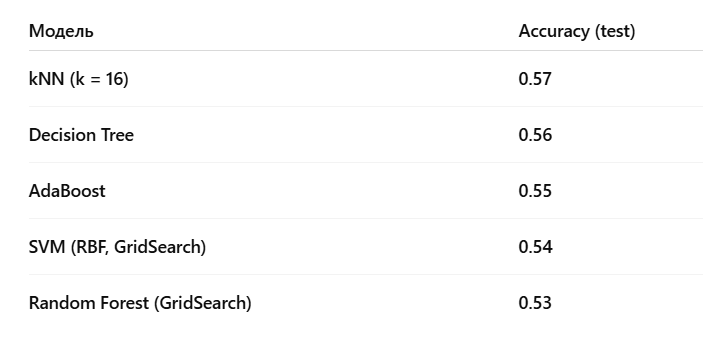

тут, ймовірно, свою роль грає:

дисбаланс класів (EX має лише 23 приклади, SE — 187),

По всіх звітах видно, що моделі найкраще відпрацьовують клас SE
(precision/recall ~0.65–0.72), а найгірше — EX (мало прикладів → низька recall/F1).